<a href="https://colab.research.google.com/github/zolo012/Machine_learning/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras

Creator: Bereczki Zoltán

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, RocCurveDisplay
import copy

np.set_printoptions(threshold=np.inf)

# 1. Implement a logistic regression model on MNIST for binary classification in Numpy
- use from sklearn.datasets import load_digits
  - the provided data files: X_train, X_test are a split generated by the author of this exercise
  - w, b are the fitted logistic regression weight and bias, the predictions on the provided test set can be generated by: y_pred_test = sigmoid(np.dot(w, X_test.T) + b)
  - the binarized accuracy score should be above 98% for this particular data
- divide the data into 0 vs. 1-9. categories
  - the goal is to separate the zeros
- y = logistic(wx + b)
- optimize the model via stochastic mini-batch gradient descent until you reach above 90% accuracy on the test set

In [ ]:
from google.colab import files

for i in range(6):
  uploaded = files.upload()

Saving b.npy to b.npy


Saving w.npy to w.npy


Saving X_test.npy to X_test.npy


Saving X_train.npy to X_train.npy


Saving y_test.npy to y_test.npy


Saving y_train.npy to y_train.npy


In [ ]:
X_test = np.load('/content/X_test.npy')
X_train = np.load('/content/X_train.npy')
y_test = np.load('/content/y_test.npy')
y_train = np.load('/content/y_train.npy')
b = np.load('/content/b.npy')
w = np.load('/content/b.npy')

In [ ]:
np.unique(y_train)


array([0, 1])

# 2. MLP model in tf.keras
- implement a model as such:

  - 750 neuron, relu activation
  - 500 neuron, relu activation
  - 500 neuron, relu activation
  - 10 neuron, softmax activation
- use the tf.keras.datasets.mnist dataset in this case

- preprocess if necessary
- use the 'sgd' optimizer, log the loss ('categorical_crossentropy') and the accuracy, as well as the AUC score during training, visualize the history of these values

In [ ]:
# load mnist dataset from keras library
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
y_test shape:  (10000,)


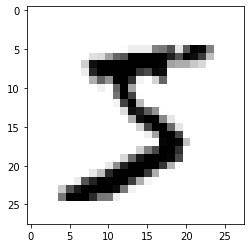

In [ ]:
# See an example from train dataset
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [ ]:
y_train[0]

5

In [ ]:
# Normalize and reshape in one step
x_train_norm = x_train.reshape(60000, 28*28)/255
x_test_norm = x_test.reshape(10000, 28*28)/255

In [ ]:
x_train_norm[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
# Convert the labels to one-hot encoded form
class_number = 10 # label range: 0-9
y_train_oh = keras.utils.to_categorical(y_train, num_classes=class_number)
y_test_oh = keras.utils.to_categorical(y_test, num_classes=class_number)

In [ ]:
y_train_oh[:5] 

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
# Build the model
seq_model = keras.models.Sequential()

seq_model.add(keras.layers.Dense(600, activation='relu', input_dim=784))
seq_model.add(keras.layers.Dense(500, activation='relu'))
seq_model.add(keras.layers.Dense(500, activation='relu'))
seq_model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
seq_model.compile(optimizer=keras.optimizers.SGD(lr=1e-2), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
seq_model_history = seq_model.fit(x=x_train_norm, y=y_train_oh, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 13s 13ms/step - loss: 0.7766 - accuracy: 0.8140 - auc: 0.9733
Epoch 2/10
938/938 [==============================] - 12s 13ms/step - loss: 0.3106 - accuracy: 0.9121 - auc: 0.9927
Epoch 3/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2534 - accuracy: 0.9277 - auc: 0.9945
Epoch 4/10
938/938 [==============================] - 12s 13ms/step - loss: 0.2184 - accuracy: 0.9373 - auc: 0.9957
Epoch 5/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1919 - accuracy: 0.9453 - auc: 0.9965
Epoch 6/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1712 - accuracy: 0.9512 - auc: 0.9971
Epoch 7/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1541 - accuracy: 0.9553 - auc: 0.9975
Epoch 8/10
938/938 [==============================] - 12s 13ms/step - loss: 0.1399 - accuracy: 0.9600 - auc: 0.9979
Epoch 9/10
938/938 [==============================] - 12s 13ms/step - lo

# 3. Evaluation
- confusion matrix on the test set
- visualize mistakes (at least 16) in a grid, show the true and the predicted labels
- plot the ROC curve for each predicted class

In [ ]:
y_pred = seq_model.predict(x_test_norm)

In [ ]:
# Convert probability prediction into real prediction (highest probability of class is the real prediction)
y_pred_dec = np.array([i.argmax() for i in y_pred])

In [ ]:
cnf_mtx = confusion_matrix(y_true=y_test, y_pred=y_pred_dec)
cnf_mtx

array([[ 962,    0,    1,    2,    0,    4,    5,    2,    2,    2],
       [   0, 1116,    3,    1,    1,    1,    5,    2,    6,    0],
       [   6,    1,  988,    3,    9,    0,    4,   12,    9,    0],
       [   1,    0,    5,  970,    0,    8,    0,   12,   10,    4],
       [   1,    0,    4,    0,  962,    0,    3,    2,    2,    8],
       [   6,    1,    1,    9,    4,  845,   12,    1,    9,    4],
       [   7,    3,    1,    1,    9,    7,  923,    2,    5,    0],
       [   0,    5,   11,    2,    6,    1,    0,  992,    2,    9],
       [   4,    1,    3,    8,   13,    4,   11,    8,  918,    4],
       [   4,    6,    1,    7,   49,    3,    1,   12,    3,  923]])

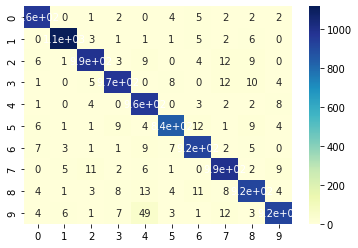

In [ ]:
# Nice representation of confusion matrix with seaborn heatmap
sns.heatmap(pd.DataFrame(cnf_mtx), annot=True, cmap="YlGnBu")

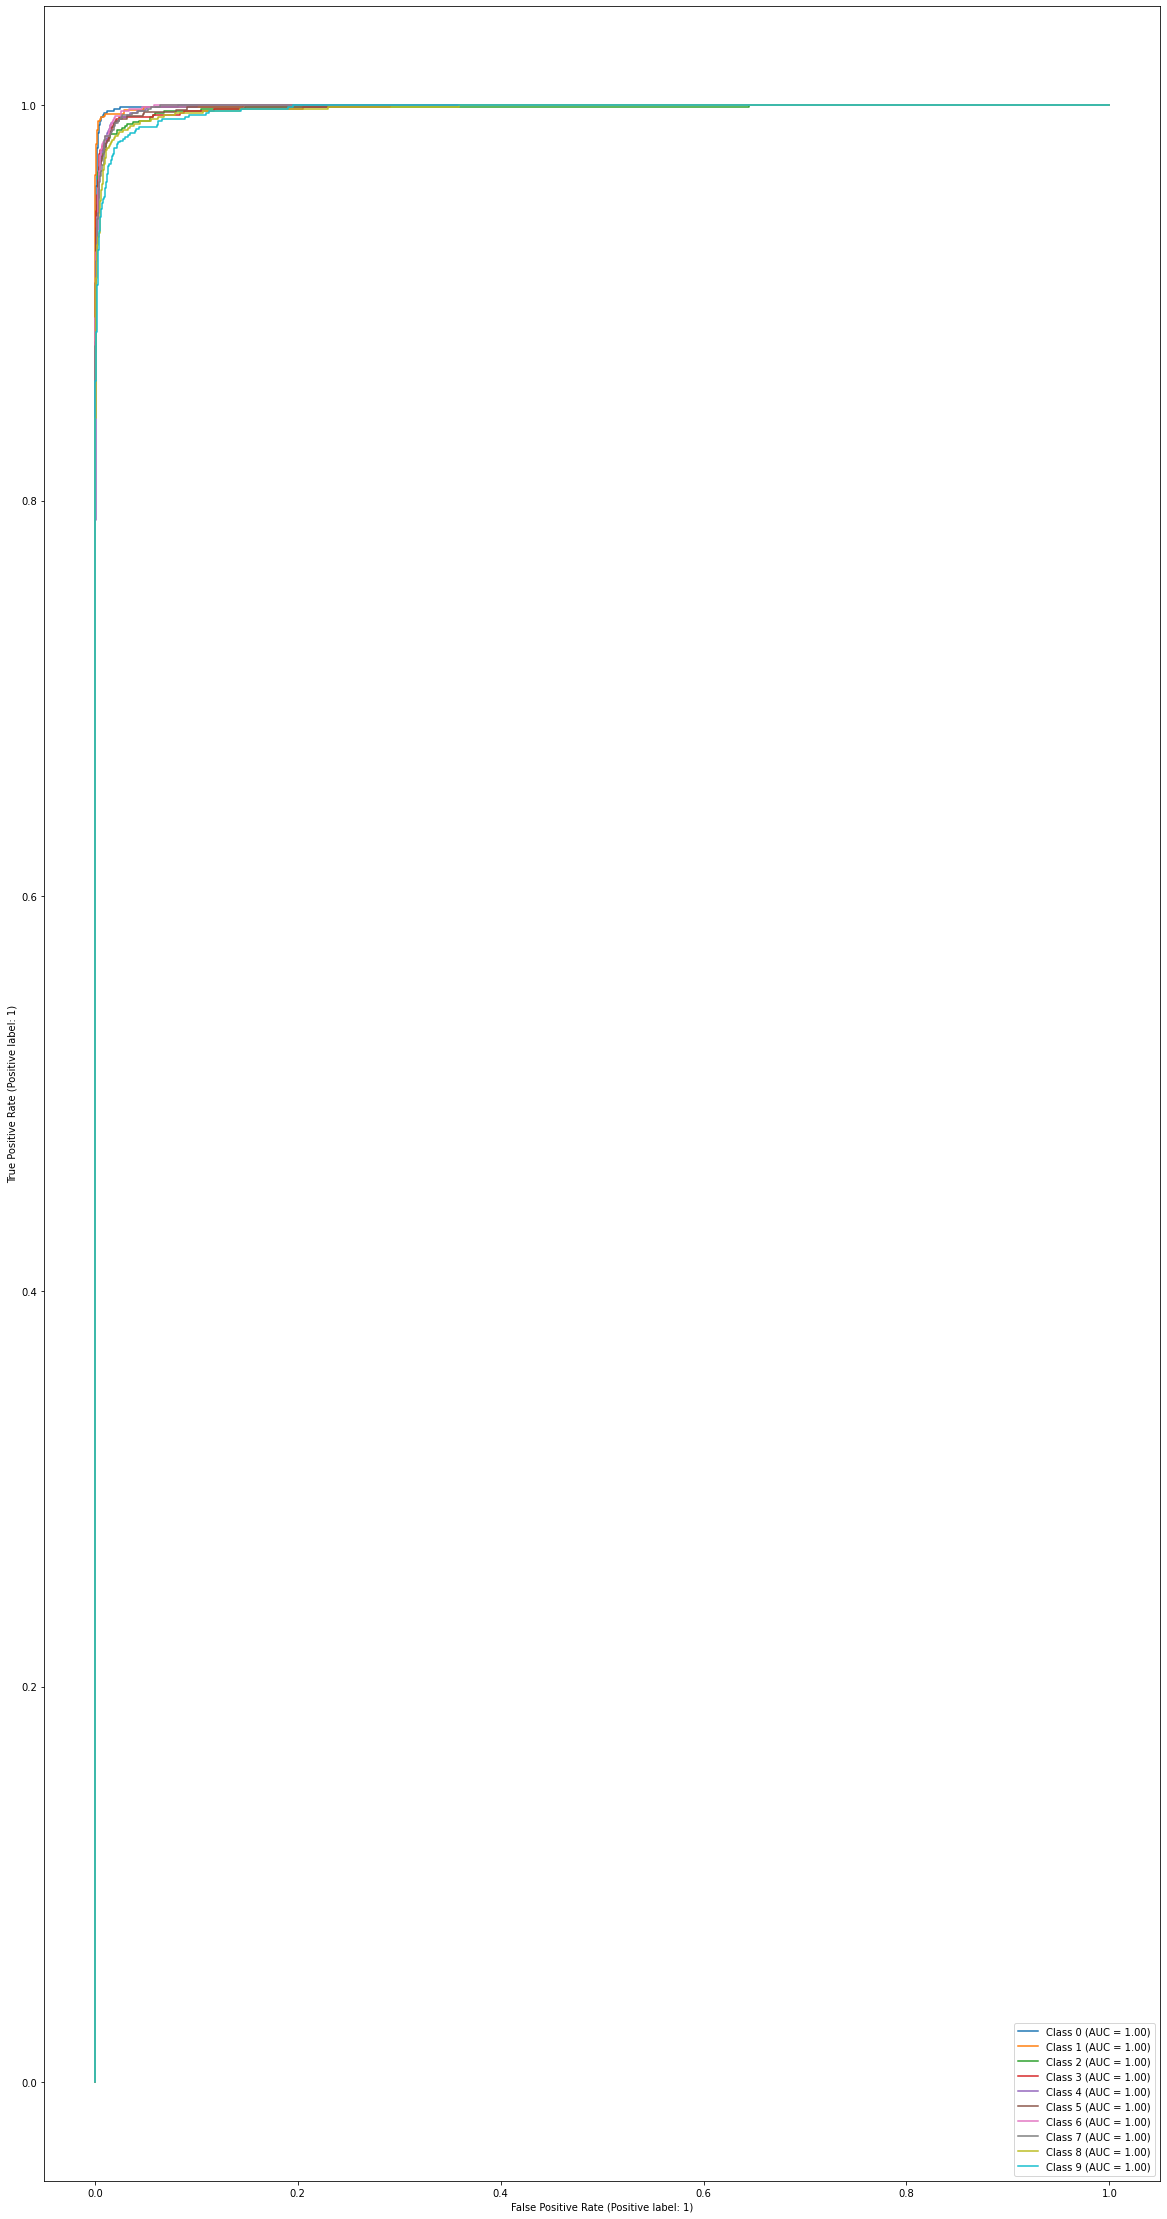

In [ ]:
# Plot ROC curves of all classes separately

# Create figure
fig, ax = plt.subplots(figsize=(20, 40))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))


(0.7, 1.1)

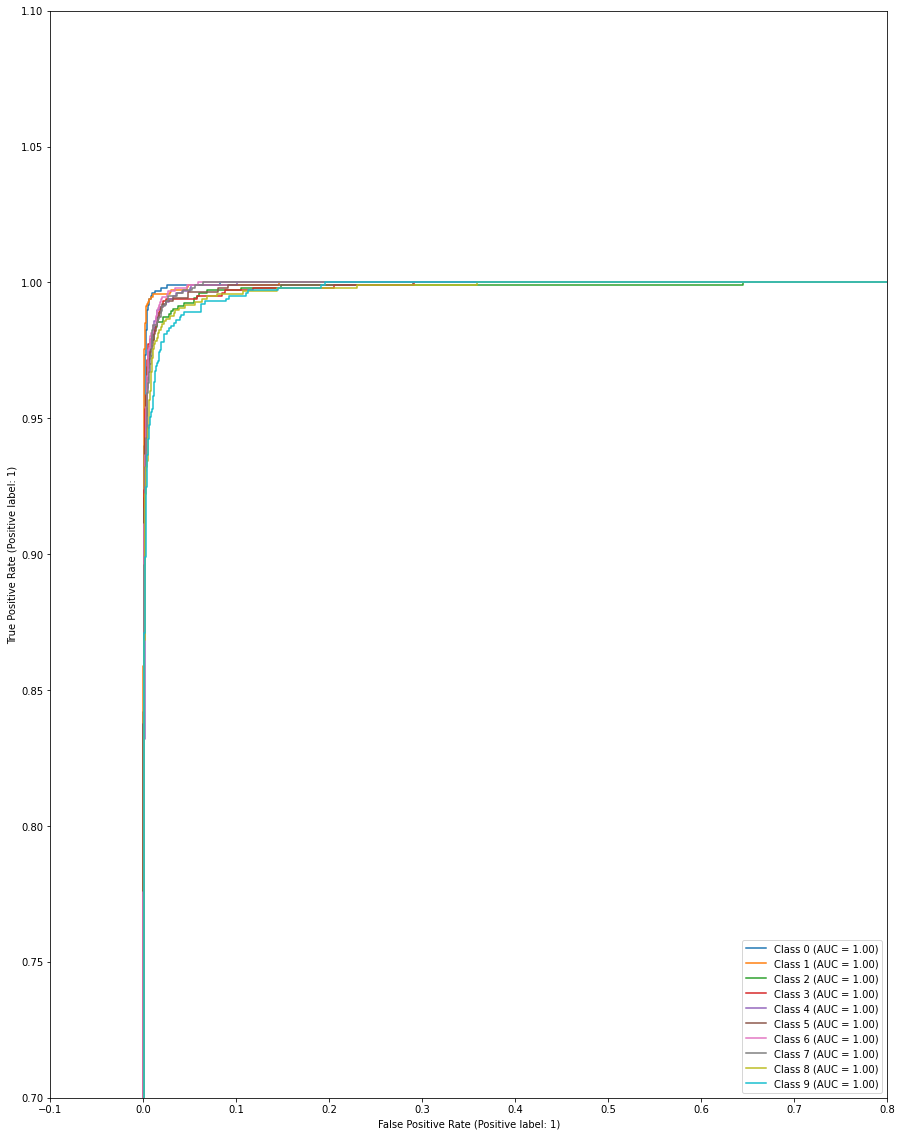

In [ ]:
# Look the previous ROC curves in smaller range since there's a small wobble

# Create figure
fig, ax = plt.subplots(figsize=(15, 20))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred])
  RocCurveDisplay.from_predictions(y_test_bi, y_pred_prob, ax=ax, name='Class {}'.format(cls))
ax.set_xlim([-0.1, 0.8])
ax.set_ylim([0.7, 1.1])





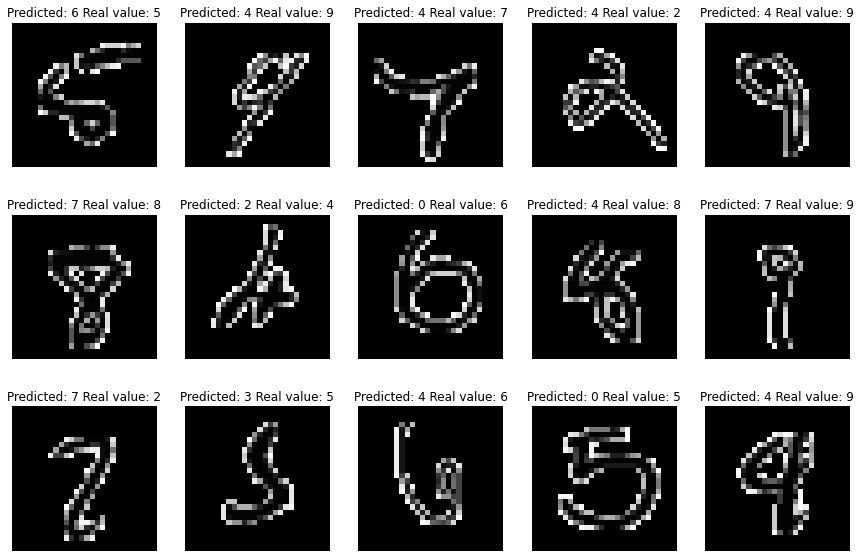

In [ ]:
# Find at least 15 wrong predictions and plot it out

plt.figure(figsize=(15, 10))
dim = 1
# loop through predictions
for id, pred in enumerate(y_pred):
  # Not plot more than 15 cases when the prediction is wrong
  if dim == 16:
    break
  else:
    # if predicted label not the real label then plot it
    if pred.argmax() != y_test[id]:
      plt.subplot(3, 5, dim)
      plt.title('Predicted: {} Real value: {}'.format(pred.argmax(), y_test[id]))
      plt.imshow(x_test[id].reshape(28, 28)*255, cmap='gray')
      plt.axis('off')
      dim += 1

fig.tight_layout()



# 4. Come up with your own model
- come up with your own small model (< 100'000 neurons)
- train it for 50 epochs
- visualize the loss for train/test on the same plot
  - what are your thoughs on the phenomenon?
- plot the ROC curves and the AUC scores

In [ ]:
# Own Sequential keras model
# Build the model
seq_model = keras.models.Sequential()

# Add hidden layers
seq_model.add(keras.layers.Dense(784, activation='relu', input_dim=784))
seq_model.add(keras.layers.Dense(400, activation='relu'))
seq_model.add(keras.layers.Dense(50, activation='relu'))
seq_model.add(keras.layers.Dense(10, activation='softmax'))

seq_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

seq_model_history = seq_model.fit(x=x_train_norm, y=y_train_oh, batch_size=64, epochs=50, validation_data=(x_test_norm, y_test_oh))

Epoch 1/50
938/938 [==============================] - 13s 13ms/step - loss: 0.1934 - accuracy: 0.9409 - auc: 0.9963 - val_loss: 0.0953 - val_accuracy: 0.9704 - val_auc: 0.9988
Epoch 2/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0816 - accuracy: 0.9747 - auc: 0.9988 - val_loss: 0.0977 - val_accuracy: 0.9701 - val_auc: 0.9982
Epoch 3/50
938/938 [==============================] - 12s 12ms/step - loss: 0.0536 - accuracy: 0.9828 - auc: 0.9993 - val_loss: 0.0850 - val_accuracy: 0.9757 - val_auc: 0.9980
Epoch 4/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0421 - accuracy: 0.9865 - auc: 0.9995 - val_loss: 0.0689 - val_accuracy: 0.9799 - val_auc: 0.9984
Epoch 5/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0350 - accuracy: 0.9885 - auc: 0.9996 - val_loss: 0.0870 - val_accuracy: 0.9758 - val_auc: 0.9973
Epoch 6/50
938/938 [==============================] - 12s 13ms/step - loss: 0.0272 - accuracy: 0.9912 - auc: 0.9997 - va

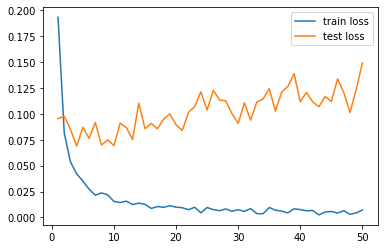

In [ ]:
# Extract train loss
train_loss = seq_model_history.history['loss']
val_loss = seq_model_history.history['val_loss']
epochs = range(1, 51)
plt.plot(epochs, train_loss, label='train loss')
plt.plot(epochs, val_loss, label='test loss')
plt.legend()



We can see the model fits well the training set based on decreasing train loss, but it becomes overfitted, because of the increasing test loss. There's a turn point (decreasing then increasing) in test loss which shows the point where the overfitting starts. In conclusion the model is overfitted, thus it can't predict well test dataset. 

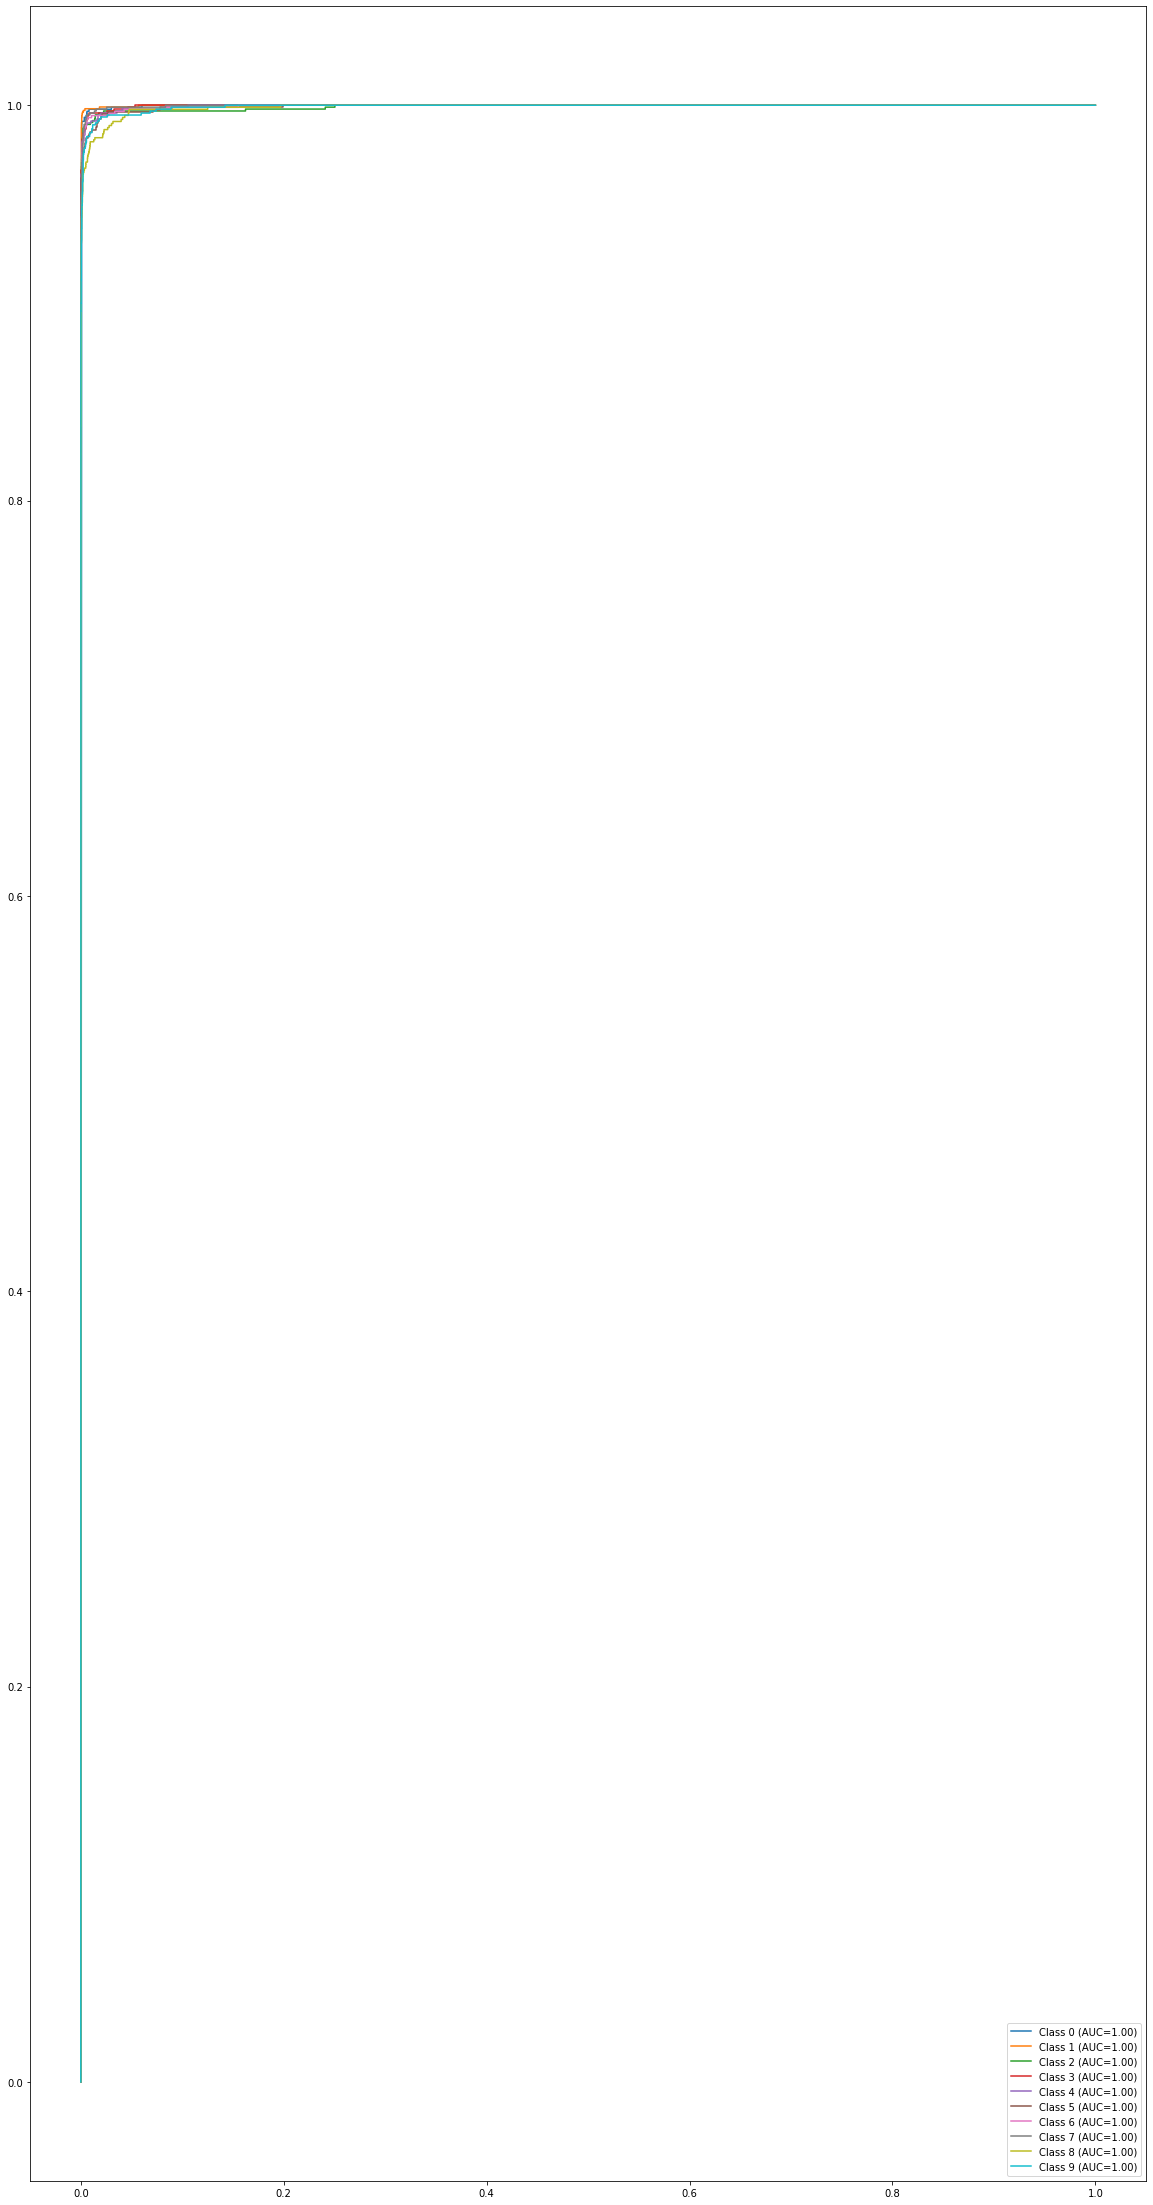

In [ ]:
# Plot ROC curve and AUC

# Predict test set
y_pred = seq_model.predict(x_test_norm)

# Plot ROC curves of all classes separately

# Create figure
fig, ax = plt.subplots(figsize=(20, 40))

for cls in np.unique(y_test):
  # Binarize the y_train based on the current label is in the current class (1) or not (0)
  y_test_bi = np.array([1 if sample_lb == cls else 0 for sample_lb in y_test])
  # Extract the current class predicted probabilities
  y_pred_prob = np.array([i[cls] for i in y_pred])
  # Compute roc curve
  fpr, tpr, thresh = roc_curve(y_test_bi, y_pred_prob)
  # Calculate AUC score
  auc = roc_auc_score(y_test_bi, y_pred_prob)
  # Plot it
  ax.plot(fpr, tpr, label='Class {} (AUC={:.2f})'.format(cls, auc))
plt.legend()


# 5. Experiment with the CIFAR10 dataset
- preprocess the data, modify the models accordingly
  - train your small model as well as the model in the 3rd task on the CIFAR10 dataset
- compare the results
- are these models powerful enough to fit this data?

In [ ]:
# load CIFAR10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# datasets shape
print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
y_train shape:  (50000, 1)
x_test shape:  (10000, 32, 32, 3)
y_test shape:  (10000, 1)


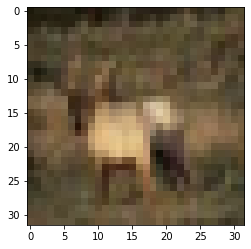

In [ ]:
plt.imshow(x_train[3])

In [ ]:
y_train[3] 

array([4], dtype=uint8)

*4 class means deer.*

In [ ]:
# Normalize data 
x_train_norm = x_train / 255
x_test_norm = x_test / 255


In [ ]:
# Convert labels into one-hot encoded version
y_train_oh = keras.utils.to_categorical(y_train)
y_test_oh = keras.utils.to_categorical(y_test)


In [ ]:
y_test[0]

array([3], dtype=uint8)

In [ ]:
y_test_oh[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
# Build model
seq_model1 = keras.Sequential()

# This is the architecture of my model from the 2nd task with a small modification (I added flatten layer to reshape the labels into 1D)
seq_model1.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
seq_model1.add(keras.layers.Dense(600, activation='relu'))
seq_model1.add(keras.layers.Dense(500, activation='relu'))
seq_model1.add(keras.layers.Dense(500, activation='relu'))
seq_model1.add(keras.layers.Dense(10, activation='softmax'))

seq_model1.compile(optimizer=keras.optimizers.SGD(lr=1e-2), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])


seq_model1_history_cifar10 = seq_model1.fit(x=x_train_norm, y=y_train_oh, batch_size=64, epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
782/782 [==============================] - 8s 7ms/step - loss: 1.9223 - accuracy: 0.3135 - auc: 0.7665
Epoch 2/10
782/782 [==============================] - 5s 7ms/step - loss: 1.7350 - accuracy: 0.3884 - auc: 0.8188
Epoch 3/10
782/782 [==============================] - 5s 7ms/step - loss: 1.6491 - accuracy: 0.4176 - auc: 0.8388
Epoch 4/10
782/782 [==============================] - 5s 7ms/step - loss: 1.5912 - accuracy: 0.4373 - auc: 0.8513
Epoch 5/10
782/782 [==============================] - 5s 7ms/step - loss: 1.5485 - accuracy: 0.4518 - auc: 0.8598
Epoch 6/10
782/782 [==============================] - 5s 7ms/step - loss: 1.5095 - accuracy: 0.4673 - auc: 0.8674
Epoch 7/10
782/782 [==============================] - 5s 7ms/step - loss: 1.4736 - accuracy: 0.4798 - auc: 0.8742
Epoch 8/10
782/782 [==============================] - 5s 7ms/step - loss: 1.4442 - accuracy: 0.4886 - auc: 0.8796
Epoch 9/10
782/782 [==============================] - 5s 7ms/step - loss: 1.4177 - accur

In [ ]:
# Own Sequential keras model
# Build the model
seq_model2 = keras.models.Sequential()

# Add hidden layers
seq_model2.add(keras.layers.Flatten(input_shape=(32, 32, 3)))
seq_model2.add(keras.layers.Dense(784, activation='relu'))
seq_model2.add(keras.layers.Dense(400, activation='relu'))
seq_model2.add(keras.layers.Dense(50, activation='relu'))
seq_model2.add(keras.layers.Dense(10, activation='softmax'))

seq_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

seq_model_history2_cifar10 = seq_model2.fit(x=x_train_norm, y=y_train_oh, batch_size=64, epochs=50, validation_data=(x_test_norm, y_test_oh))

Epoch 1/50
782/782 [==============================] - 8s 9ms/step - loss: 2.1612 - accuracy: 0.1756 - auc: 0.6649 - val_loss: 2.0178 - val_accuracy: 0.2136 - val_auc: 0.7286
Epoch 2/50
782/782 [==============================] - 7s 9ms/step - loss: 1.8662 - accuracy: 0.3021 - auc: 0.7821 - val_loss: 1.7601 - val_accuracy: 0.3556 - val_auc: 0.8115
Epoch 3/50
782/782 [==============================] - 6s 8ms/step - loss: 1.7252 - accuracy: 0.3732 - auc: 0.8207 - val_loss: 1.6672 - val_accuracy: 0.4093 - val_auc: 0.8365
Epoch 4/50
782/782 [==============================] - 6s 8ms/step - loss: 1.6294 - accuracy: 0.4132 - auc: 0.8429 - val_loss: 1.6242 - val_accuracy: 0.4158 - val_auc: 0.8460
Epoch 5/50
782/782 [==============================] - 6s 8ms/step - loss: 1.5582 - accuracy: 0.4385 - auc: 0.8576 - val_loss: 1.5489 - val_accuracy: 0.4437 - val_auc: 0.8595
Epoch 6/50
782/782 [==============================] - 7s 9ms/step - loss: 1.5118 - accuracy: 0.4571 - auc: 0.8667 - val_loss: 1.56

If we see the history of both model, then we can see my own model with 50 epochs (latter model) reached ~70% accuracy while the previous model has only reached ~50% accuracy. Moreover the loss for train set decreased at the case of both models, but both model's loss remained relatively high.

All in all, my own model performed better than the 2nd task given model. However none of both was able to achive accuracy above 98%, thereby these models **aren't powerful** enough to fit this data. 